<IPython.core.display.Javascript object>


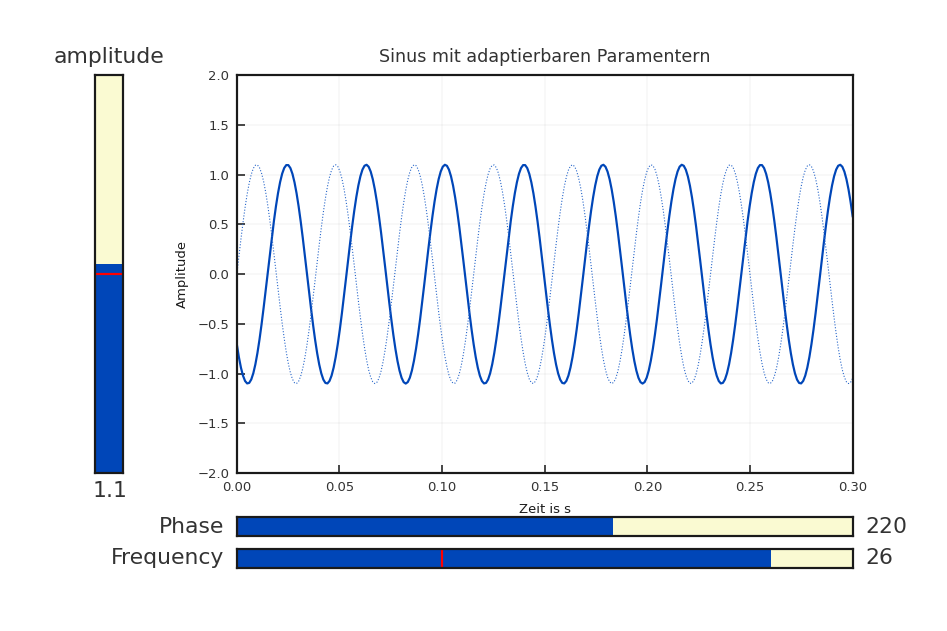

In [1]:
%matplotlib notebook
import matplotlib
import numpy
from matplotlib import pyplot
from matplotlib.widgets import Slider

matplotlib.style.use('sv1_style.mplstyle')

# adaptiert aus: https://matplotlib.org/3.1.3/gallery/widgets/slider_demo.html

amplitude = 1
freq = 10 # in Hz
delta_f = 1 # in Hz
phase = 0
T = 0.02 # Time in s
t = numpy.linspace(0, 0.3, 300) # 0 to 0.02 s

# calculates sinus with given values
sin_t = amplitude * numpy.sin(2 * numpy.pi * t * freq + phase)

# plots sinus
fig_sin, ax_sin = pyplot.subplots()
pyplot.subplots_adjust(left=0.25, bottom=0.25)
graph, = ax_sin.plot(t, sin_t, lw=1) # current graph
graph_prev, = ax_sin.plot(t, sin_t, lw=0.5, ls=':') # used as previous graph to compare with current
ax_sin.set(xlabel='Zeit is s', ylabel='Amplitude', title='Sinus mit adaptierbaren Paramentern', xlim=[0, 0.3], ylim=[-2, 2])

# adds a slider for frequency, amplitude and phase of the sinus each
axcolor = 'lightgoldenrodyellow'
ax_freq = pyplot.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_amplitude = pyplot.axes([0.1, 0.25, 0.03, 0.63], facecolor=axcolor)
ax_phase = pyplot.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

slider_freq = Slider(ax_freq, 'Frequency', 0, 30.0, valinit=freq, valstep=delta_f)
slider_amplitude = Slider(ax_amplitude, 'amplitude', -1, 3, valinit=amplitude, valstep=0.1, orientation='vertical')
slider_phase = Slider(ax_phase, 'Phase', 0, 360, valinit=phase, valstep=5)


# updates the graph once a value has been changed
def update(val):
    global amplitude, freq, phase
    graph_prev.set_ydata(graph.get_ydata()) # graph_prev takes on the data of the current graph before it is changed
    #reads the slides values
    amplitude = slider_amplitude.val
    freq = slider_freq.val
    phase = slider_phase.val
    #calculates new signal with these values
    graph.set_ydata(amplitude * numpy.sin( 2 * numpy.pi * (freq * t +  (phase/360)))) 
    #ax_sin.set_ylim([-round(amplitude)-1, round(amplitude)+1])
    fig_sin.canvas.draw_idle()

slider_freq.on_changed(update)
slider_amplitude.on_changed(update)
slider_phase.on_changed(update)

pyplot.show()